Convolution provides a way of multiplying two arrays to produce a third array. Depending on the designed
filter and the intended effect, the kernel can be a matrix of dimensions, for example, 3x3, 5x5 or 7x7

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os

a) Code a function that takes an input image, performs convolution with a given kernel, and returns the
resulting image.

In [2]:
def ICV_convolution(image, kernel):
    #getting image height, width and channels
    original_img_height = image.shape[0]
    original_img_width = image.shape[1]
    original_img_channels = image.shape[2]
    
    #calulating kernel multiplication factor 
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    #creating empty image to store convolution output image 
    final_img = np.zeros([original_img_height - kernel_h//2 + 1,original_img_width - kernel_w//2 + 1,3],dtype=np.uint8)
    
    for i in range(0+(kernel_h//2), original_img_height-(kernel_h//2)): #iterating image height
        for j in range(0+(kernel_w//2), original_img_width-(kernel_w//2)): #iterating image width
            for k in range(original_img_channels): ##iterating image channels
                #getting block of  image to be convoluted
                if kernel_w>kernel_h:
                    #if kernel width is greater than height
                    conv_part = image[i-(kernel_h//2):i+(kernel_w//2),j-(kernel_h//2):j+(kernel_w//2)+1,k] 
                    
                elif kernel_h>kernel_w:
                    #if kernel height is greater than width
                    conv_part = image[i-(kernel_h//2):i+(kernel_h//2),j-(kernel_w//2):j+(kernel_w//2)+1,k] 
                    
                else:
                    #if kernel is symmentric
                    conv_part = image[i-(kernel_h//2):i+(kernel_h//2)+1,j-(kernel_w//2):j+(kernel_w//2)+1,k]
                
                #convolution operation
                con_sum = np.sum(conv_part * kernel) // (kernel_h*kernel_w)
                
                #image clipping
                if con_sum < 0:
                    #avoid negative values for pixels
                    final_img[i][j][k] = 0
                elif con_sum > 255:
                    #clipping values highter than 255
                    final_img[i][j][k] = 255
                else:
                    final_img[i][j][k] = con_sum 
            
    return final_img 
    
    

b) Design a convolution kernel that computes, for each pixel, the average intensity value in a 3x3 region.
Use this kernel and the filtering function above, and save the resulting image. 

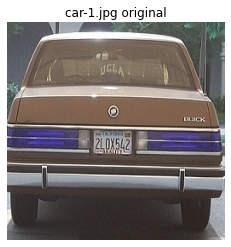

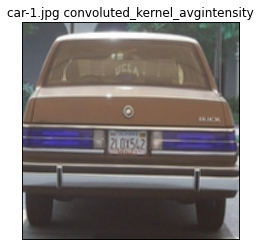

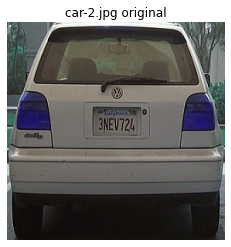

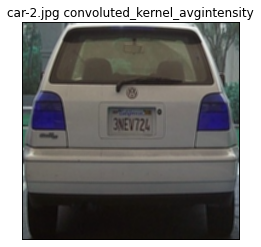

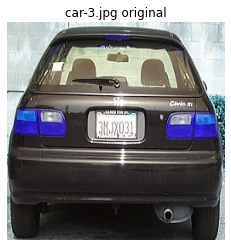

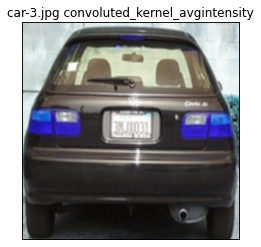

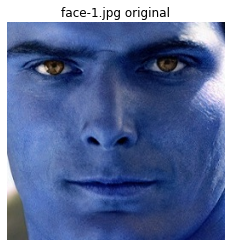

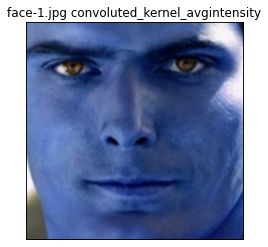

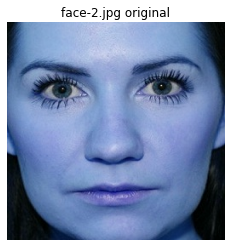

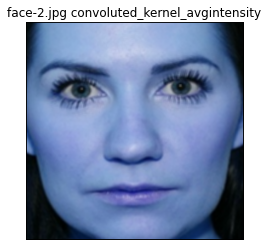

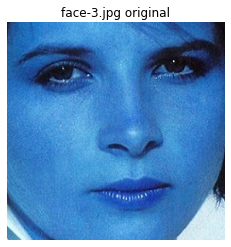

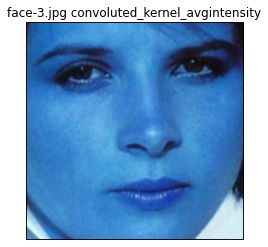

In [3]:
kernel = np.array([[1, 1, 1],   #average intensity kernel
                  [1, 1, 1],
                  [1, 1, 1]])

conv_output_path =os.getcwd() + '\\convolution_output' #setting output image path
if not os.path.isdir(conv_output_path):
    os.mkdir(conv_output_path)

images_path = os.getcwd()+'/DatasetA' #input image path
for images in os.listdir(images_path): #parsing through all files in directory
    if images[-3:]=='jpg': #checking if file is image or not
        images_name = images_path + '/' + images #getting image name
        img = cv2.imread(images_name) #reading image
        convulated_image = ICV_convolution(img, kernel) #parsing image to convolution function
    
        plt.axis('off')
        plt.imshow(img)
        plt.title(images + ' original')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_original.jpg")
        plt.show()
        plt.axis('off')
        plt.imshow(convulated_image)
        plt.title(images + ' convoluted_kernel_avgintensity')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_convoluted_kernel_avgintensity.jpg")
        plt.show()
        

c) Use the kernels provided below, apply the filtering function and save the resulting images. Comment
on the effect of each kernel.<br>
kernel A<br>
1 2 1<br>
2 4 2<br>
1 2 1<br>
kernel B<br>
0 1 0<br>
1 -4 1<br>
0 1 0<br>


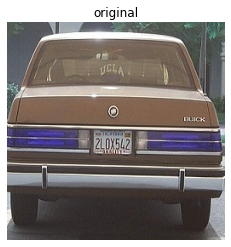

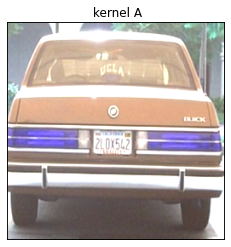

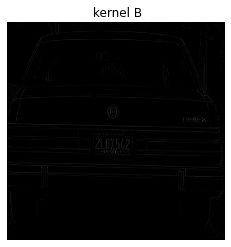

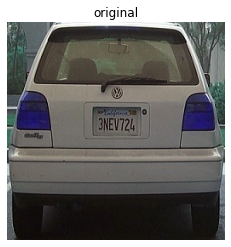

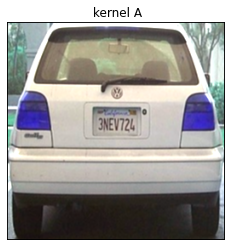

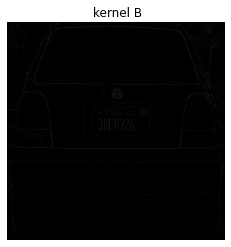

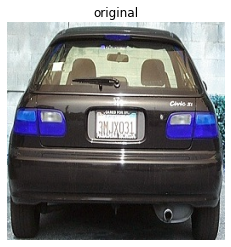

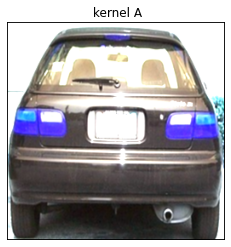

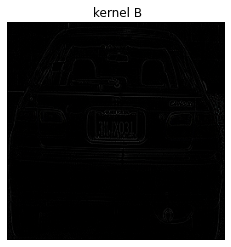

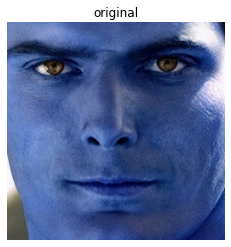

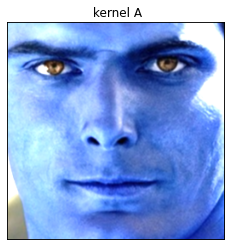

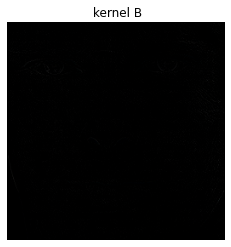

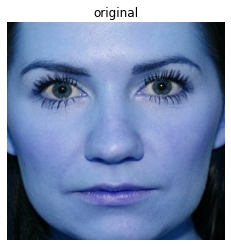

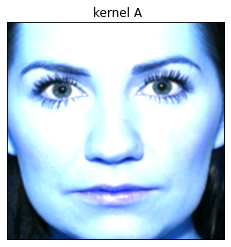

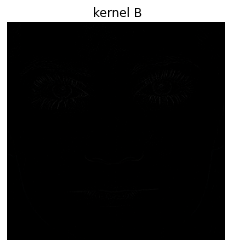

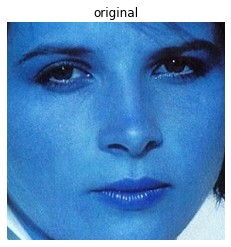

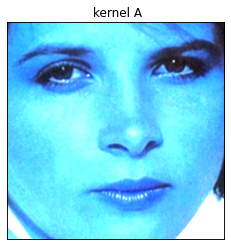

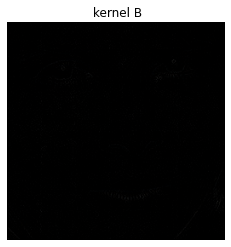

In [4]:
kernel_A = np.array([[1, 2, 1], #gaussian filter
                  [2, 4, 2],
                  [1, 2, 1]])

kernel_B = np.array([[0, 1, 0], #Laplace filter
                  [1, -4, 1],
                  [0, 1, 0]])

name_output_path =os.getcwd() + '\\convolution_output' #setting output image path
if not os.path.isdir(name_output_path):
    os.mkdir(name_output_path)

images_path = os.getcwd()+'/DatasetA' #input image path
for images in os.listdir(images_path): #parsing through all files in directory
    if images[-3:]=='jpg': #checking if file is image or not
        images_name = images_path + '/' + images #getting image name
        img = cv2.imread(images_name) #reading image
        
        plt.axis('off')
        plt.imshow(img)
        plt.title('original')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_original.jpg") #plotting original image
        plt.show()
        
        plt.axis('off')
        plt.imshow(ICV_convolution(img, kernel_A))
        plt.title(' kernel A')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_convoluted_kernel_A.jpg") #plotting kernel A output
        plt.show()
        
        plt.axis('off')
        plt.imshow(ICV_convolution(img, kernel_B))
        plt.title(' kernel B')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_convoluted_kernel_B.jpg") #plotting kernel A output
        plt.show()
        

d) Use the filtering function for the following filtering operations: (i) A followed by A; (ii) A followed by B;
(iii) B followed by A. Comment the results. 

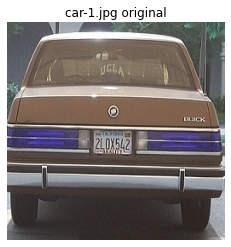

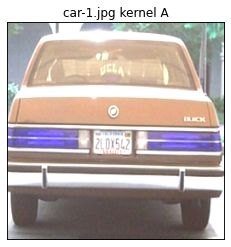

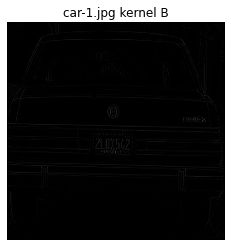

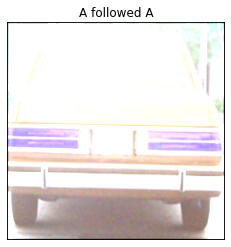

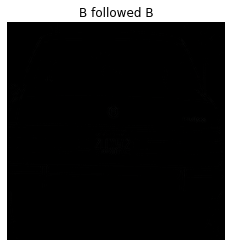

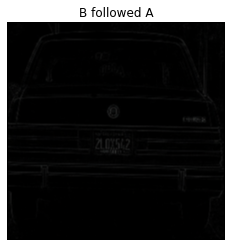

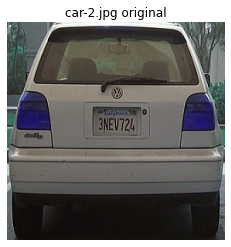

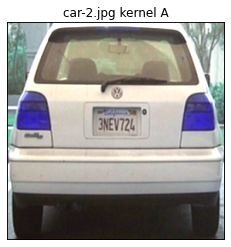

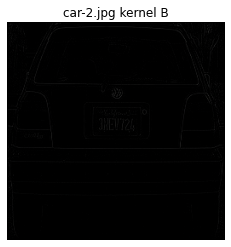

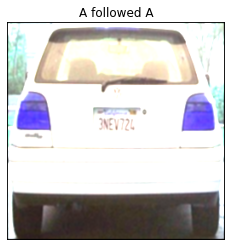

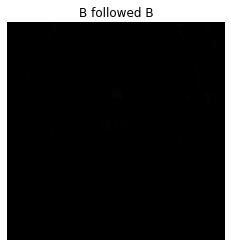

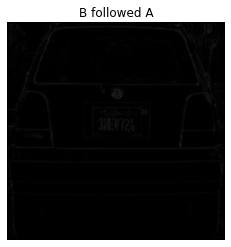

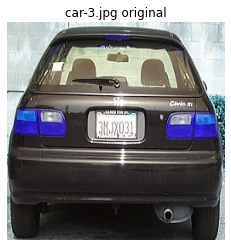

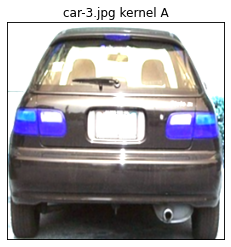

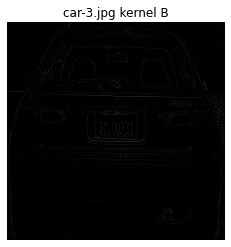

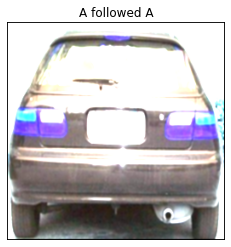

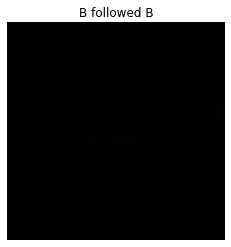

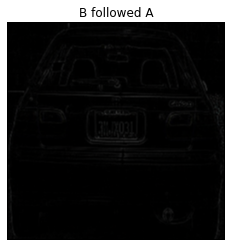

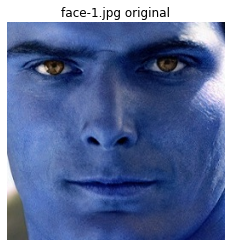

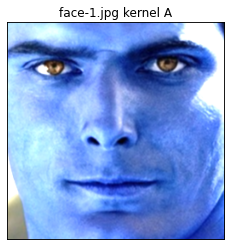

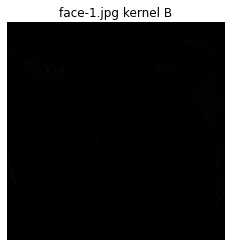

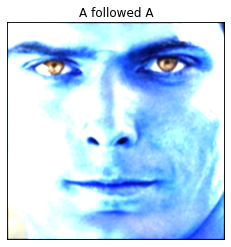

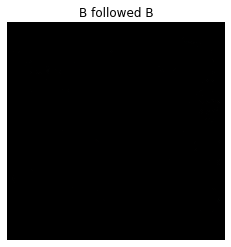

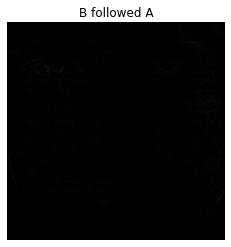

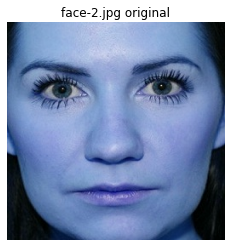

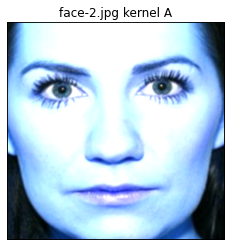

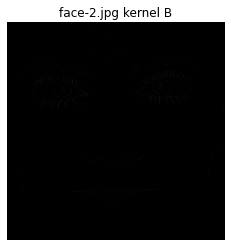

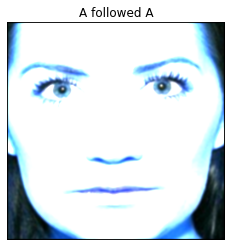

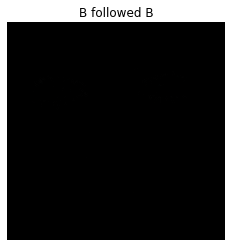

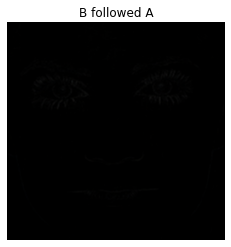

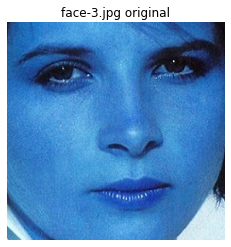

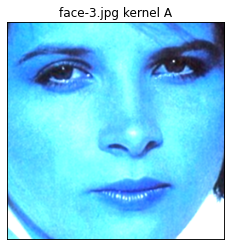

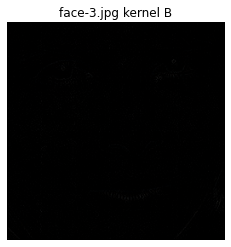

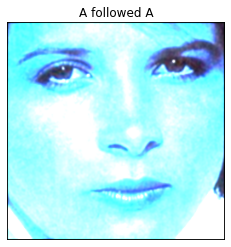

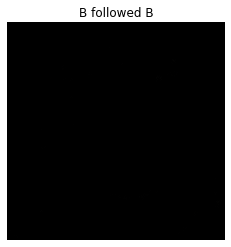

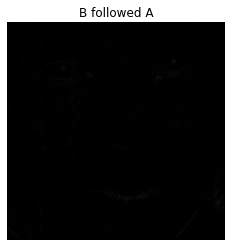

In [5]:
images_path = os.getcwd()+'/DatasetA' #input image path
for images in os.listdir(images_path): #parsing through all files in directory
    if images[-3:]=='jpg': #checking if file is image or not
        images_name = images_path + '/' + images #getting image name
        img = cv2.imread(images_name) #reading image
        
        img_kernel_A = ICV_convolution(img, kernel_A) #performing convolution wirh kernel A
        img_kernel_A_A = ICV_convolution(img_kernel_A, kernel_A) #performing convolution wirh kernel A followed by kernel A
        img_kernel_B = ICV_convolution(img, kernel_B) #performing convolution wirh kernel B
        img_kernel_B_B = ICV_convolution(img_kernel_B, kernel_B) #performing convolution wirh kernel B followed by kernel B
        img_kernel_B_A = ICV_convolution(img_kernel_B,kernel_A) #performing convolution wirh kernel B followed by kernel A
        
        plt.axis('off')
        plt.imshow(img)
        plt.title(images + ' original')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_original.jpg") #plotting original output
        plt.show()
        
        plt.axis('off')
        plt.imshow(img_kernel_A) #plotting kernel A output
        plt.title(images+' kernel A')
        plt.show()
        
        plt.axis('off')
        plt.imshow(img_kernel_B) #plotting kernel A output
        plt.title(images+' kernel B')
        plt.show()
        
        plt.axis('off')
        plt.imshow(img_kernel_A_A)
        plt.title('A followed A')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_convoluted_kernel_A_followed_A.jpg")#plotting convolution wirh kernel A followed by kernel A
        plt.show()
        
        plt.axis('off')
        plt.imshow(img_kernel_B_B)
        plt.title('B followed B')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_convoluted_kernel_B_followed_B.jpg")#plotting convolution wirh kernel B followed by kernel B
        plt.show()
        
        plt.axis('off')
        plt.imshow(img_kernel_B_A)
        plt.title('B followed A')
        plt.savefig(conv_output_path+"\\"+images[:-3]+"_convoluted_kernel_B_followed_A.jpg")#plotting convolution wirh kernel B followed by kernel A
        plt.show()
